<a href="https://colab.research.google.com/github/G36maid/electricity_monitor/blob/main/COIL_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df_electricity_consumption = pd.read_csv('/content/electricity_consumption_data_with_location.csv')
df_power_generation = pd.read_csv('/content/power_generation_data.csv')
df_weather = pd.read_csv('/content/weather_data_summer.csv')

In [ ]:
#df_electricity_consumption

In [ ]:
df_electricity_consumption.head()

,Latitude,Longitude,Building_ID,Datetime,Category,Weekday_Weekend,Consumption_kW
0,25.158234,121.502811,Building_10,2024-08-01 00:00:00,residential,Weekday,1.86
1,25.158234,121.502811,Building_10,2024-08-01 01:00:00,residential,Weekday,1.63
2,25.158234,121.502811,Building_10,2024-08-01 02:00:00,residential,Weekday,2.28
3,25.158234,121.502811,Building_10,2024-08-01 03:00:00,residential,Weekday,2.20
4,25.158234,121.502811,Building_10,2024-08-01 04:00:00,residential,Weekday,1.76


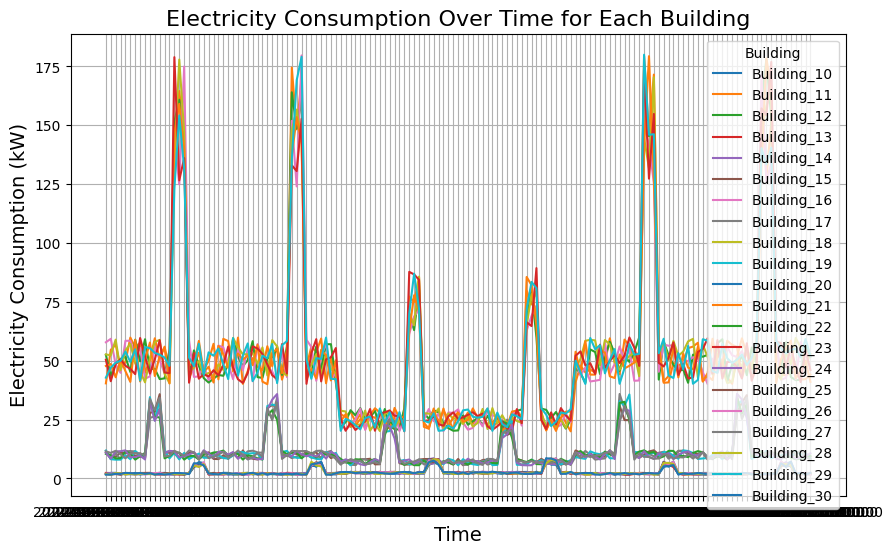

In [ ]:
###Electricity consumption overtime ###

# group by Building_ID
grouped = df_electricity_consumption.groupby('Building_ID')

# graph
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# plot by building id
for building_id, group in grouped:
    plt.plot(group['Datetime'], group['Consumption_kW'], label=building_id)

# title, labels and so on
plt.title("Electricity Consumption Over Time for Each Building", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Electricity Consumption (kW)", fontsize=14)
plt.legend(title="Building", loc="upper right")
plt.grid(True)

#show
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datetime column to datetime型
df_electricity_consumption['Datetime'] = pd.to_datetime(df_electricity_consumption['Datetime'])

# 特定の日付のデータを抽出
specific_date = "2024-08-01"
df_filtered = df_electricity_consumption[df_electricity_consumption['Datetime'].dt.strftime('%Y-%m-%d') == specific_date]

# データフレームの確認
print(df_filtered)


       Latitude   Longitude  Building_ID            Datetime     Category  \
0     25.158234  121.502811  Building_10 2024-08-01 00:00:00  residential   
1     25.158234  121.502811  Building_10 2024-08-01 01:00:00  residential   
2     25.158234  121.502811  Building_10 2024-08-01 02:00:00  residential   
3     25.158234  121.502811  Building_10 2024-08-01 03:00:00  residential   
4     25.158234  121.502811  Building_10 2024-08-01 04:00:00  residential   
...         ...         ...          ...                 ...          ...   
2919  25.002095  121.590921  Building_30 2024-08-01 19:00:00  residential   
2920  25.002095  121.590921  Building_30 2024-08-01 20:00:00  residential   
2921  25.002095  121.590921  Building_30 2024-08-01 21:00:00  residential   
2922  25.002095  121.590921  Building_30 2024-08-01 22:00:00  residential   
2923  25.002095  121.590921  Building_30 2024-08-01 23:00:00  residential   

     Weekday_Weekend  Consumption_kW  
0            Weekday            1.86

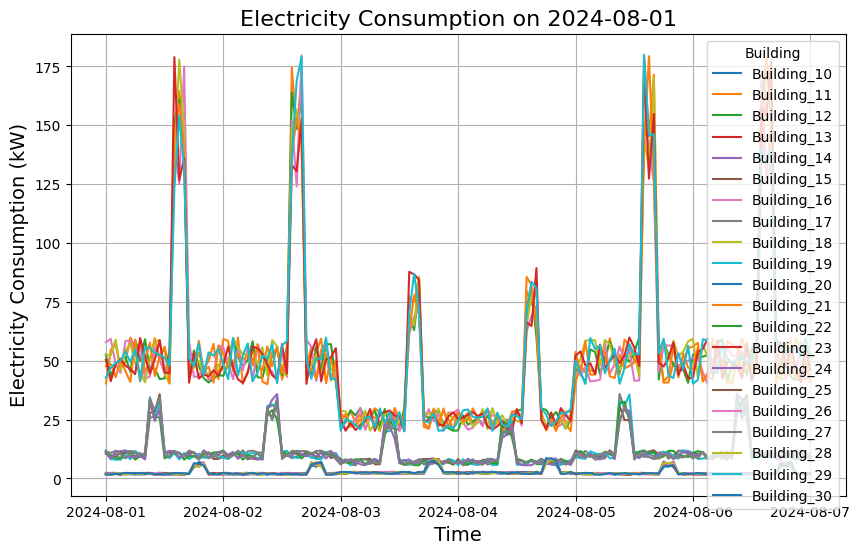

In [ ]:
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# 各建物ごとにプロット
for building_id, group in grouped:
    plt.plot(group['Datetime'], group['Consumption_kW'], label=building_id)

# title and labels
plt.title(f"Electricity Consumption on {specific_date}", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Electricity Consumption (kW)", fontsize=14)

plt.legend(title="Building", loc="upper right")

plt.grid(True)

# show
plt.show()


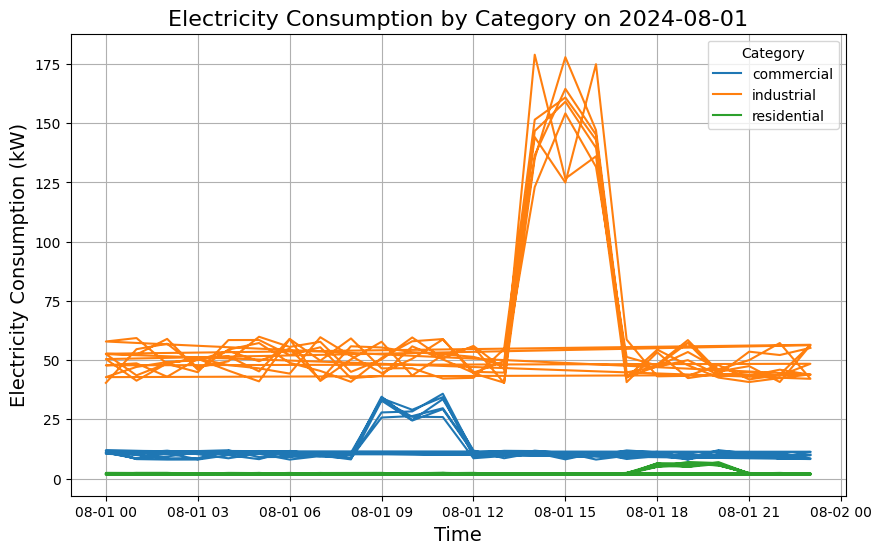

In [ ]:
# grouping by categories
grouped_by_category = df_filtered.groupby('Category')

# 折れ線グラフの描画
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# plotting by categories
for category, group in grouped_by_category:
    plt.plot(group['Datetime'], group['Consumption_kW'], label=category)

# title and labels
plt.title(f"Electricity Consumption by Category on {specific_date}", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Electricity Consumption (kW)", fontsize=14)
plt.legend(title="Category", loc="upper right")
plt.grid(True)

# show
plt.show()

In [ ]:
#power_generation

In [ ]:
df_power_generation.head()

,Datetime,Source,Generation_MW
0,2024/8/1 0:00,solar,0.00
1,2024/8/1 0:00,wind,12.56
2,2024/8/1 0:00,hydropower,15.34
3,2024/8/1 0:00,fossil_fuel,102.47
4,2024/8/1 0:00,nuclear,80.09


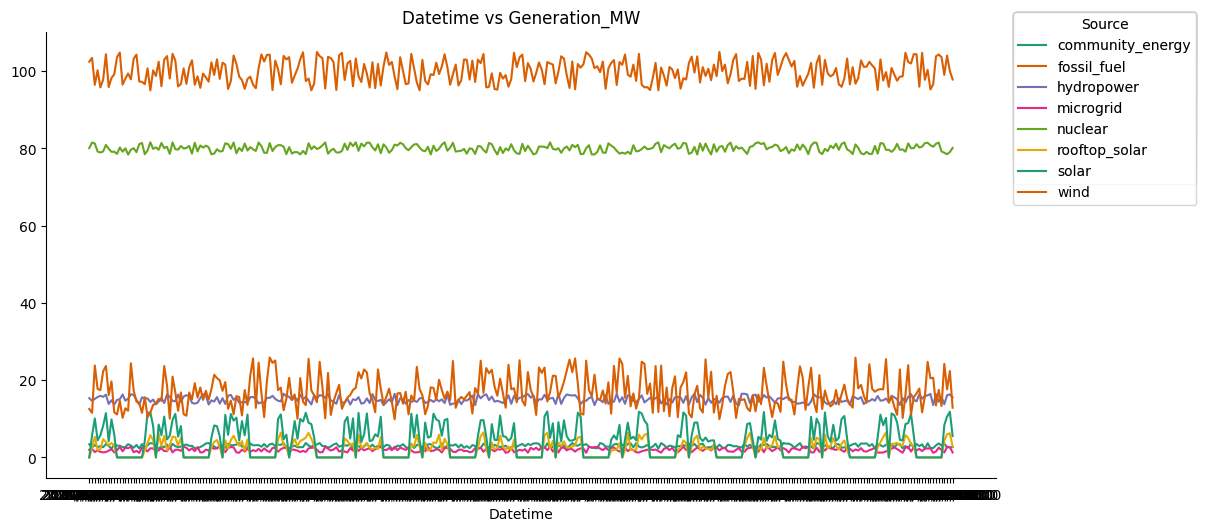

In [ ]:
# title Datetime vs Generation_MW

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['Generation_MW']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_power_generation.sort_values('Datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
plt.title('Datetime vs Generation_MW')
plt.show()

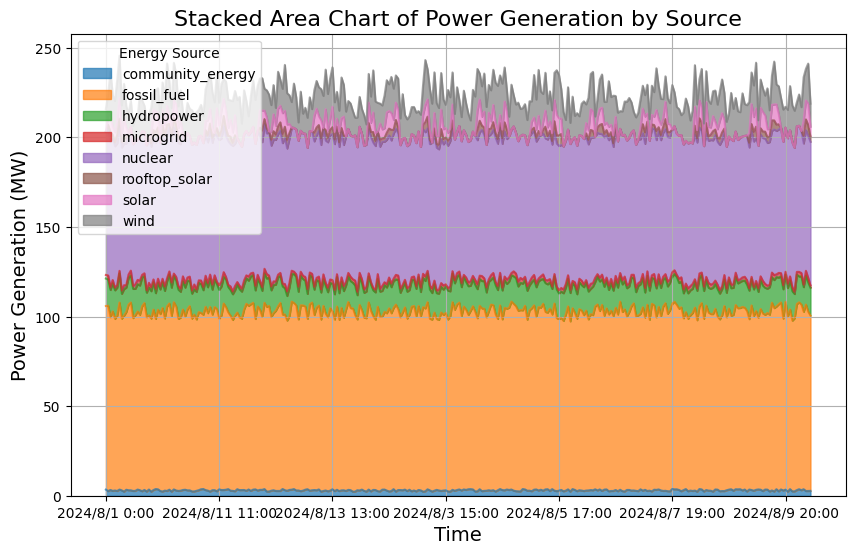

In [ ]:
df_agg = df_power_generation.groupby(['Datetime', 'Source'], as_index=False).agg({'Generation_MW': 'sum'})
pivot_df = df_agg.pivot(index='Datetime', columns='Source', values='Generation_MW')


# スタックエリアチャートの描画
pivot_df.plot(kind='area', figsize=(10, 6), alpha=0.7)

# タイトルとラベルの設定
plt.title("Stacked Area Chart of Power Generation by Source", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Power Generation (MW)", fontsize=14)

# 凡例の設定
plt.legend(title="Energy Source", loc="upper left")

# グリッドの追加
plt.grid(True)

# グラフを表示
plt.show()


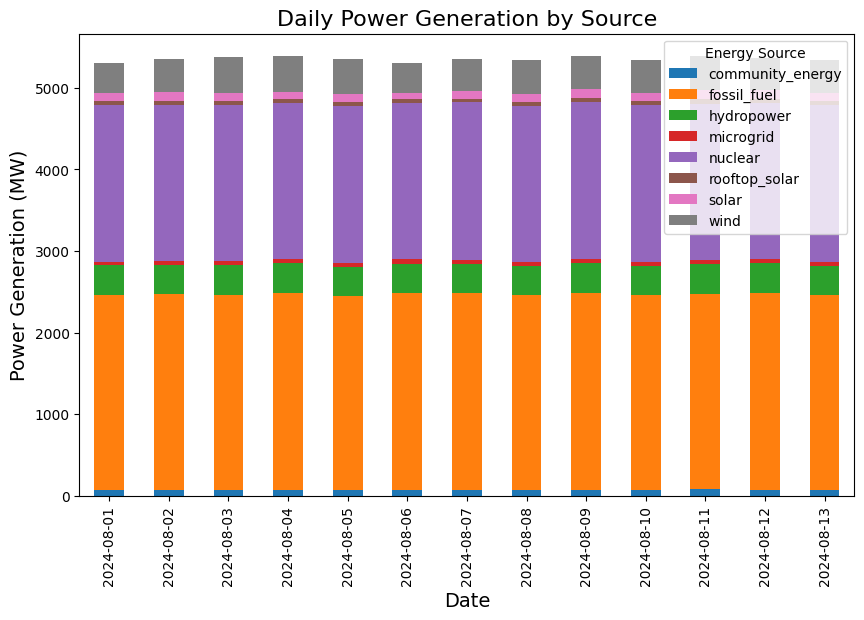

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datetime列をdatetime型に変換
df_power_generation['Datetime'] = pd.to_datetime(df_power_generation['Datetime'])

# 日単位での発電量の集計
df_power_generation['Date'] = df_power_generation['Datetime'].dt.date

# 'Generation_MW'列に対してsum()を適用
daily_generation = df_power_generation.groupby(['Date', 'Source'])['Generation_MW'].sum().reset_index()

# ピボットテーブルの作成
pivot_df = daily_generation.pivot(index='Date', columns='Source', values='Generation_MW')

# 積み上げ棒グラフの描画
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# グラフのタイトルとラベルを設定
plt.title("Daily Power Generation by Source", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Power Generation (MW)", fontsize=14)

# 凡例の設定
plt.legend(title="Energy Source", loc="upper right")

# グラフを表示
plt.show()


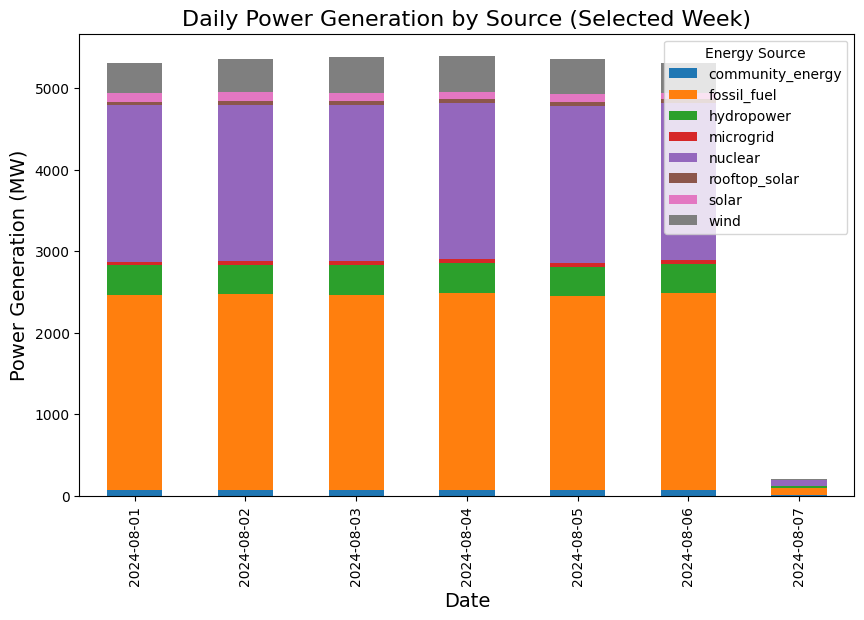

In [ ]:
# 日付列を追加
df_power_generation['Date'] = df_power_generation['Datetime'].dt.date

# 対象となる1週間の開始日を指定
start_date = pd.to_datetime("2024-08-01")  # ここを変更して週を変える
end_date = start_date + pd.Timedelta(days=6)  # 1週間分のデータを選択

# 1週間分のデータをフィルタリング
df_filtered = df_power_generation[(df_power_generation['Datetime'] >= start_date) & (df_power_generation['Datetime'] <= end_date)]

# 日単位での発電量の集計
daily_generation = df_filtered.groupby(['Date', 'Source'])['Generation_MW'].sum().reset_index()

# ピボットテーブルの作成
pivot_df = daily_generation.pivot(index='Date', columns='Source', values='Generation_MW')

# 積み上げ棒グラフの描画
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# グラフのタイトルとラベルを設定
plt.title("Daily Power Generation by Source (Selected Week)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Power Generation (MW)", fontsize=14)

# 凡例の設定
plt.legend(title="Energy Source", loc="upper right")

# グラフを表示
plt.show()

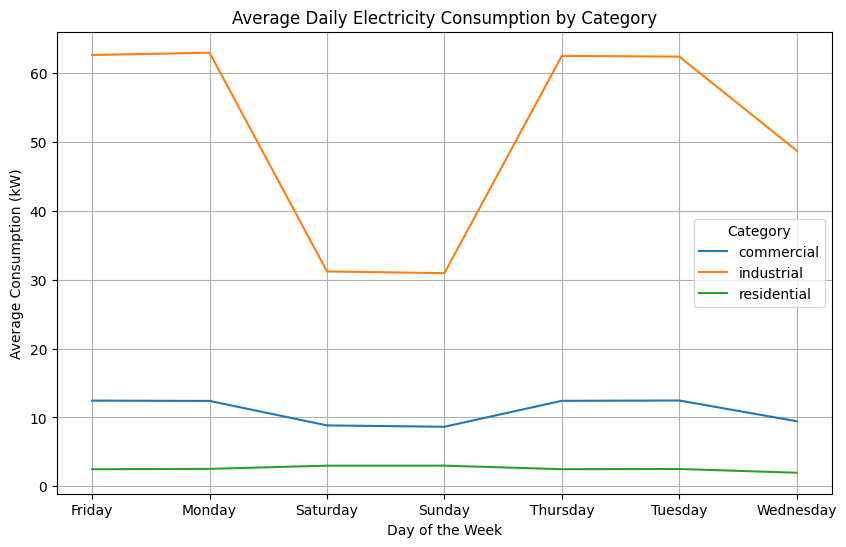

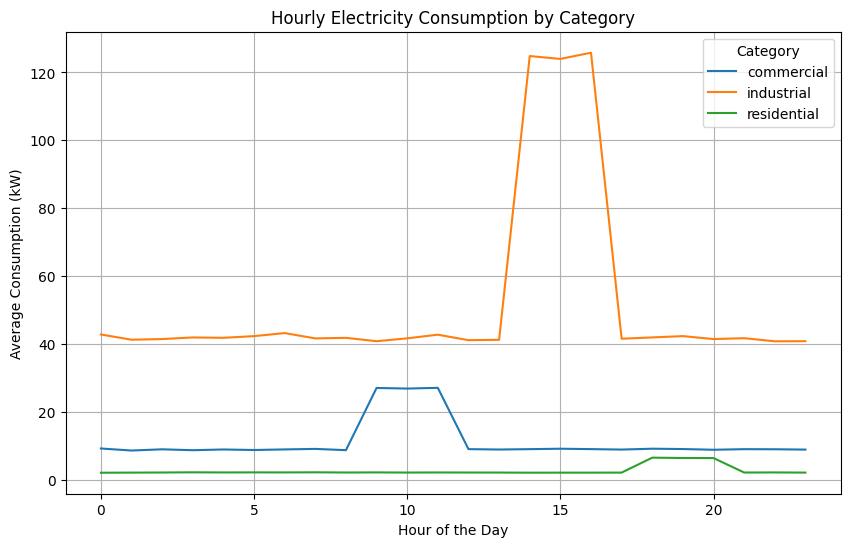

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the electricity consumption data (assuming it's already generated)
consumption_df = pd.read_csv('electricity_consumption_data.csv', parse_dates=['Datetime'])

# Extract necessary time-related features
consumption_df['DayOfWeek'] = consumption_df['Datetime'].dt.day_name()
consumption_df['Hour'] = consumption_df['Datetime'].dt.hour

# Daily consumption pattern by category
daily_consumption = consumption_df.groupby(['DayOfWeek', 'Category']).agg({'Consumption_kW': 'mean'}).reset_index()

# Plot daily consumption pattern
plt.figure(figsize=(10, 6))
for category in daily_consumption['Category'].unique():
    subset = daily_consumption[daily_consumption['Category'] == category]
    plt.plot(subset['DayOfWeek'], subset['Consumption_kW'], label=category)

plt.title('Average Daily Electricity Consumption by Category')
plt.xlabel('Day of the Week')
plt.ylabel('Average Consumption (kW)')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Hourly consumption pattern by category
hourly_consumption = consumption_df.groupby(['Hour', 'Category']).agg({'Consumption_kW': 'mean'}).reset_index()

# Plot hourly consumption pattern
plt.figure(figsize=(10, 6))
for category in hourly_consumption['Category'].unique():
    subset = hourly_consumption[hourly_consumption['Category'] == category]
    plt.plot(subset['Hour'], subset['Consumption_kW'], label=category)

plt.title('Hourly Electricity Consumption by Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Consumption (kW)')
plt.legend(title='Category')
plt.grid(True)
plt.show()


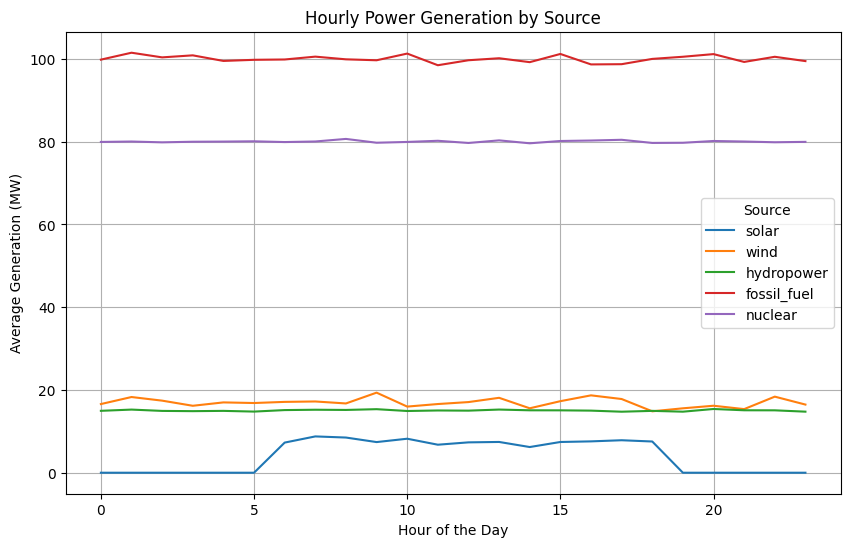

In [ ]:
# Load the power generation data (assuming it's already generated)
generation_df = pd.read_csv('power_generation_data.csv', parse_dates=['Datetime'])

# Extract necessary time-related features
generation_df['Hour'] = generation_df['Datetime'].dt.hour

# Aggregated generation data by source and hour
hourly_generation = generation_df.groupby(['Hour', 'Source']).agg({'Generation_MW': 'mean'}).reset_index()

# Plot hourly generation pattern
plt.figure(figsize=(10, 6))
for source in ['solar', 'wind', 'hydropower', 'fossil_fuel', 'nuclear']:
    subset = hourly_generation[hourly_generation['Source'] == source]
    plt.plot(subset['Hour'], subset['Generation_MW'], label=source)

plt.title('Hourly Power Generation by Source')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Generation (MW)')
plt.legend(title='Source')
plt.grid(True)
plt.show()


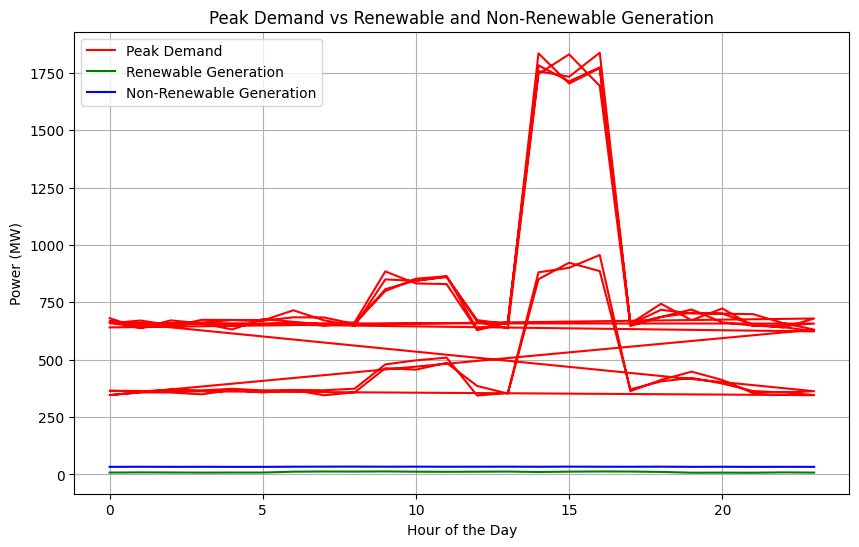

In [ ]:
# Identify peak demand times by summing consumption across all buildings
peak_demand_df = consumption_df.groupby('Datetime').agg({'Consumption_kW': 'sum'}).reset_index()
peak_demand_df['Hour'] = peak_demand_df['Datetime'].dt.hour

# Average renewable and non-renewable generation by hour
generation_df['Renewable'] = generation_df['Source'].isin(['solar', 'wind'])
generation_by_type = generation_df.groupby(['Hour', 'Renewable']).agg({'Generation_MW': 'mean'}).reset_index()

# Plot peak demand and generation comparison
plt.figure(figsize=(10, 6))
plt.plot(peak_demand_df['Hour'], peak_demand_df['Consumption_kW'], label='Peak Demand', color='red')

# Plot renewable and non-renewable generation
renewable_generation = generation_by_type[generation_by_type['Renewable'] == True]
nonrenewable_generation = generation_by_type[generation_by_type['Renewable'] == False]
plt.plot(renewable_generation['Hour'], renewable_generation['Generation_MW'], label='Renewable Generation', color='green')
plt.plot(nonrenewable_generation['Hour'], nonrenewable_generation['Generation_MW'], label='Non-Renewable Generation', color='blue')

plt.title('Peak Demand vs Renewable and Non-Renewable Generation')
plt.xlabel('Hour of the Day')
plt.ylabel('Power (MW)')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:          Generation_MW   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1404.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          4.37e-282
Time:                        23:00:44   Log-Likelihood:                -2570.8
No. Observations:                 936   AIC:                             5148.
Df Residuals:                     933   BIC:                             5162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.102e+13   3.02e+13     -1.027      0.3

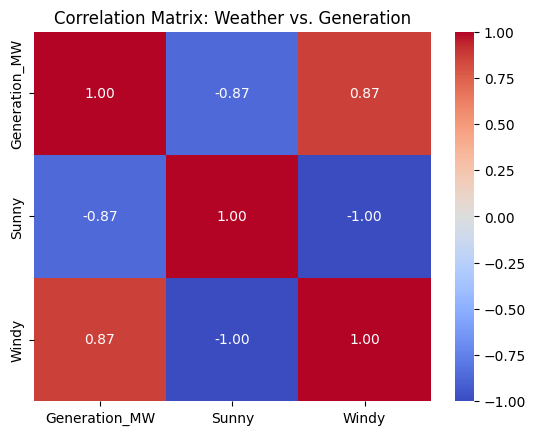

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the power generation data
generation_df = pd.read_csv('power_generation_data.csv', parse_dates=['Datetime'])

# Extract weather-related features
generation_df['Sunny'] = generation_df['Source'].apply(lambda x: 1 if x == 'solar' or x == 'rooftop_solar' else 0)
generation_df['Windy'] = generation_df['Source'].apply(lambda x: 1 if x == 'wind' else 0)

# Filter for solar and wind data only
solar_wind_df = generation_df[generation_df['Source'].isin(['solar', 'rooftop_solar', 'wind'])]

# Prepare the data for regression
X = solar_wind_df[['Sunny', 'Windy']]
y = solar_wind_df['Generation_MW']

# Add constant to X for the linear regression model
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Correlation matrix for visual representation
corr_matrix = solar_wind_df[['Generation_MW', 'Sunny', 'Windy']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix: Weather vs. Generation')
plt.show()


Correlation between Consumption and Generation by Category:
Category
commercial     0.005954
industrial     0.004662
residential   -0.003684
dtype: float64
Residential Regression Coefficients:
Intercept: 2.6659440698135684
Coefficient: -0.00014956035383833369



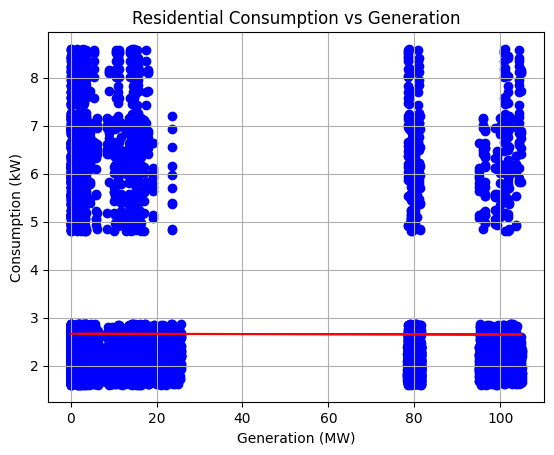

Commercial Regression Coefficients:
Intercept: 11.154789994643624
Coefficient: 0.0010456560800667129



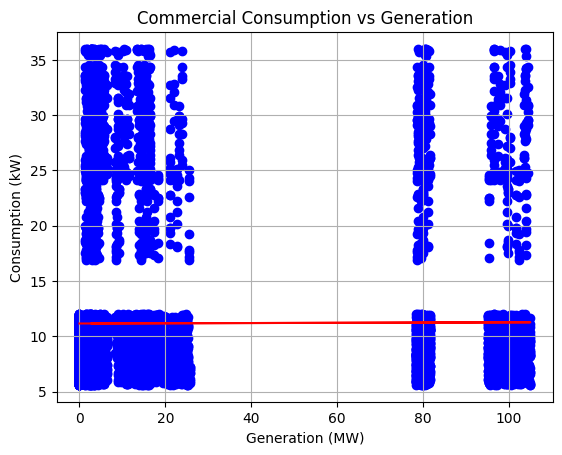

Industrial Regression Coefficients:
Intercept: 51.94416330879752
Coefficient: 0.004186820043482937



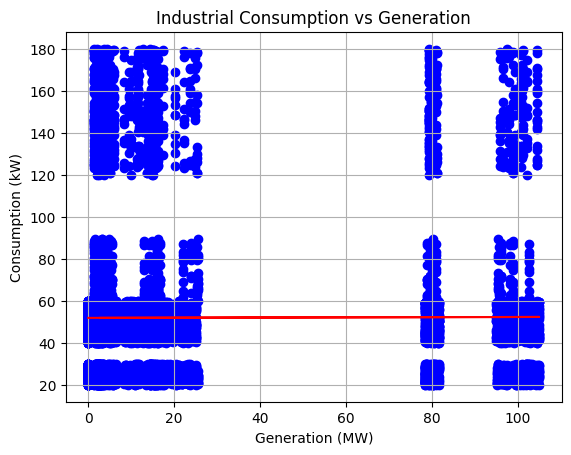

In [ ]:
# Load the electricity consumption and power generation data
consumption_df = pd.read_csv('electricity_consumption_data.csv', parse_dates=['Datetime'])
generation_df = pd.read_csv('power_generation_data.csv', parse_dates=['Datetime'])

# Merge consumption and generation data based on Datetime
merged_df = pd.merge(consumption_df, generation_df, on='Datetime')

# Analyze correlation between consumption and generation for each category
category_corr = merged_df.groupby('Category').apply(lambda x: x['Consumption_kW'].corr(x['Generation_MW']))

print("Correlation between Consumption and Generation by Category:")
print(category_corr)

# Perform linear regression for each category (e.g., residential and solar)
for category in ['residential', 'commercial', 'industrial']:
    subset = merged_df[merged_df['Category'] == category]

    # Prepare the data for regression
    X = subset[['Generation_MW']]  # Independent variable: generation
    y = subset['Consumption_kW']    # Dependent variable: consumption

    # Perform linear regression using scikit-learn
    model = LinearRegression()
    model.fit(X, y)

    # Print the coefficient and intercept for each category
    print(f"{category.capitalize()} Regression Coefficients:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficient: {model.coef_[0]}")
    print()

    # Plot the regression
    plt.scatter(X, y, color='blue')
    plt.plot(X, model.predict(X), color='red')
    plt.title(f'{category.capitalize()} Consumption vs Generation')
    plt.xlabel('Generation (MW)')
    plt.ylabel('Consumption (kW)')
    plt.grid(True)
    plt.show()
